In [15]:
# https://www.kaggle.com/datasets/uciml/iris/data
# https://www.kaggle.com/code/syifaudinridho/petal-iris-analysis-classification
# https://www.kaggle.com/code/bmhjn24/irisspeciesclassifier-a-beginner-friendly-approach

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
file_path = 'C:/Users/User/Downloads/Iris.csv'
df = pd.read_csv(file_path)
print("CSV file read successfully!")

CSV file read successfully!


In [18]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (150, 6)


In [19]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [22]:
df.describe(include=object).T

,count,unique,top,freq
Species,150,3,Iris-setosa,50


In [27]:
# check missing values

# 1. Identify Missing Values (Boolean DataFrame)
missing_values_bool = df.isna()

# 2. Count Missing Values per Column
missing_values_count = missing_values_bool.sum()
print("Number of missing values per column:")
print(missing_values_count)

# 3. Get the Total Number of Missing Values
total_missing_values = missing_values_count.sum()
print(f"\nTotal number of missing values in the DataFrame: {total_missing_values}")

Number of missing values per column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Total number of missing values in the DataFrame: 0


In [26]:
# check duplicated values

# 1. Identify Duplicate Rows
duplicate_series = df.duplicated()

# 2. Count Duplicate Rows
number_of_duplicates = duplicate_series.sum()
print(f"Number of duplicate rows: {number_of_duplicates}")

# 3. View Duplicate Rows (Optional)
if number_of_duplicates > 0:
    duplicate_rows = df[duplicate_series]
    print("\nDuplicate rows:")
    print(duplicate_rows)
else:
    print("\nNo duplicate rows found.")

Number of duplicate rows: 0

No duplicate rows found.


Counts of each species:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


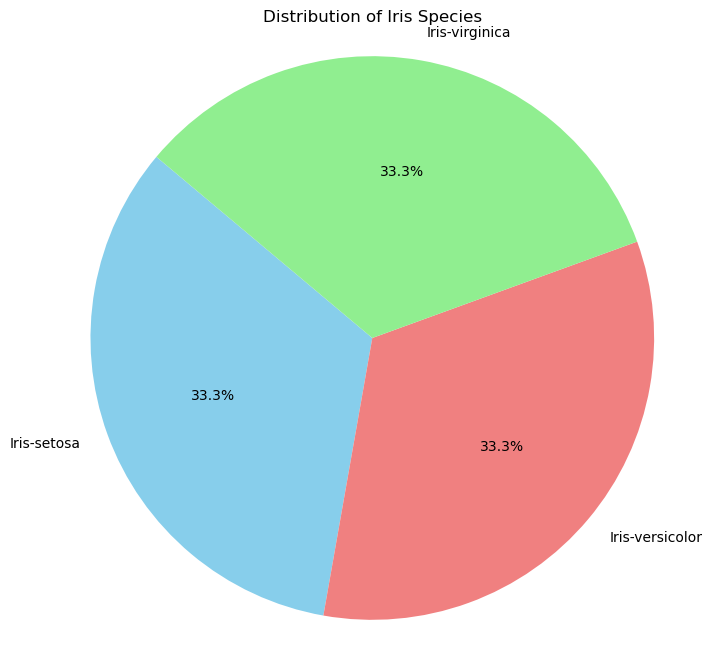

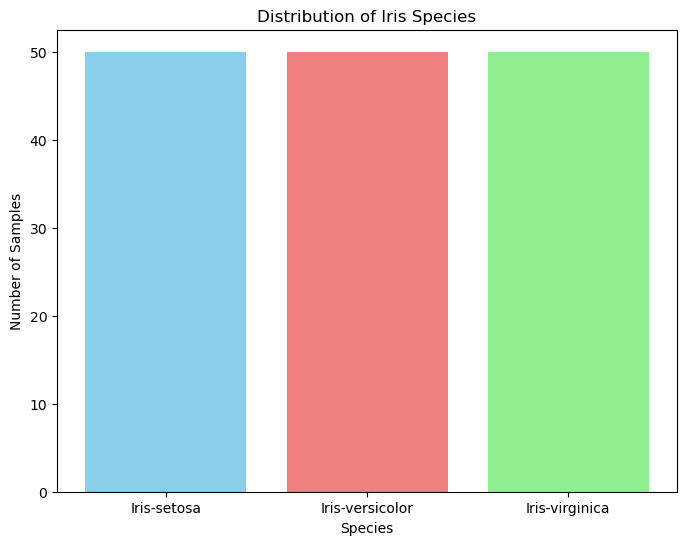

In [29]:
# check distribution

# 1. Get the value counts of the 'Species' column
species_counts = df['Species'].value_counts()
print("Counts of each species:\n", species_counts)

# 2. Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(species_counts,
        labels=species_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Iris Species')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 3. Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(species_counts.index, species_counts.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Species')
plt.ylabel('Number of Samples')
plt.title('Distribution of Iris Species')
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\User\AppData\Local\Temp\ipykernel_15720\1952090566.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap


<Figure size 1000x1000 with 0 Axes>

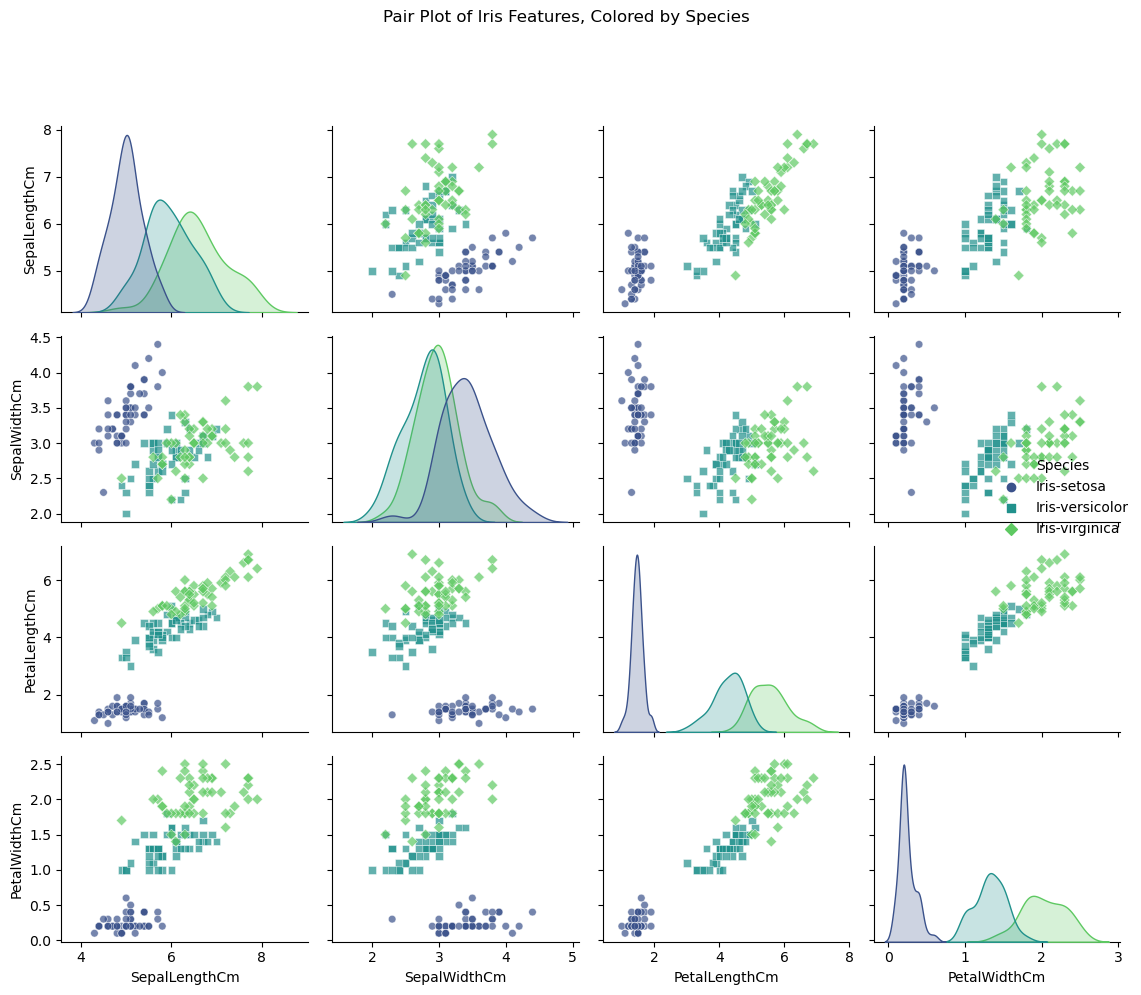

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))  # Increase figure size
sns.pairplot(df.drop('Id', axis=1),
             hue='Species',
             palette='viridis',  # Try a different color palette
             markers=['o', 's', 'D'],  # Use different markers for each species
             diag_kind='kde',  # Show KDE on the diagonal instead of histograms
             kind='scatter',
             plot_kws={'alpha': 0.7, 's': 30}) # Add transparency and adjust point size
plt.suptitle("Pair Plot of Iris Features, Colored by Species", y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap
plt.show()

In [35]:
# FEATURE ENGINEERING
# Drop the 'Id' column as it is not relevant for modeling
data = df.drop(columns=['Id'])

# Separate features and target
X = data.drop(columns=['Species'])  # Features
y = data['Species']  # Target

In [37]:
# MODELLING 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

In [38]:
# EVALUATION
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 100.0 %


In [39]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



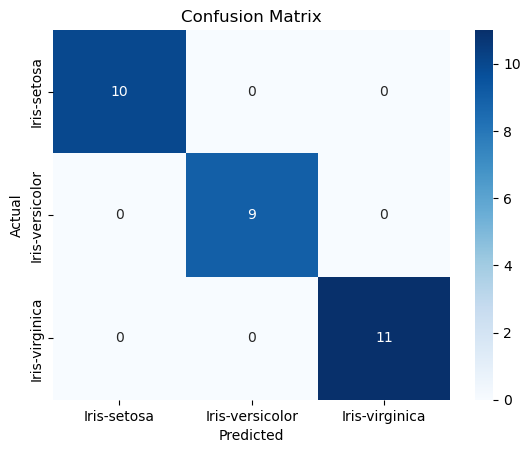

In [40]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()